##### 1) Delivery_time -- Predict delivery time using sorting time

In [1]:
#Suppressing all unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing required libraries for reading dataset
import pandas as pd
import numpy as np

In [3]:
#Importing the dataset
df = pd.read_csv("delivery_time.csv")
df.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [4]:
#Renaming the columns to remove 'space' between variables
df = df.rename({'Delivery Time' : 'Delivery_Time', 'Sorting Time' : 'Sorting_Time'}, axis = 1)

In [5]:
df

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


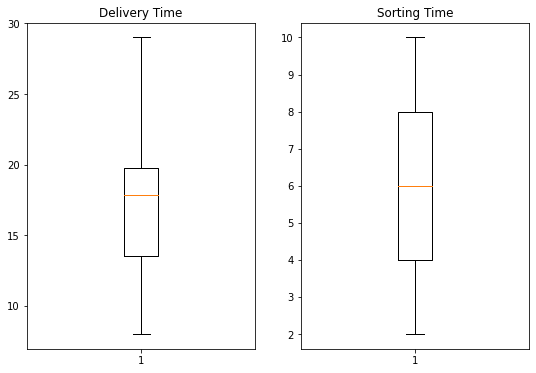

In [7]:
# Plotting data to check for outliers

import matplotlib.pyplot as plt

plt.subplots(figsize = (9, 6))
plt.subplot(121)
plt.boxplot(df['Delivery_Time'])
plt.title('Delivery Time')
plt.subplot(122)
plt.boxplot(df['Sorting_Time'])
plt.title('Sorting Time')
plt.show()

In [8]:
df.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

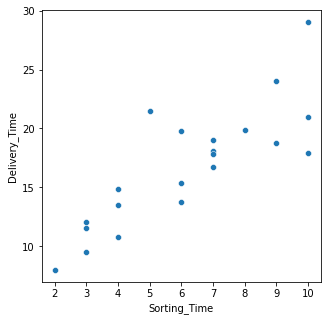

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (5, 5))
sns.scatterplot(x = 'Sorting_Time', y = 'Delivery_Time', data = df, palette = 'Set1')

# Correlation

In [10]:
#Finding the correlation 
df.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

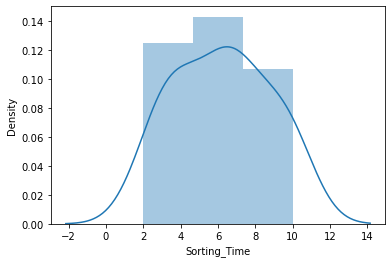

In [11]:
import seaborn as sns
sns.distplot(df['Sorting_Time'])

<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

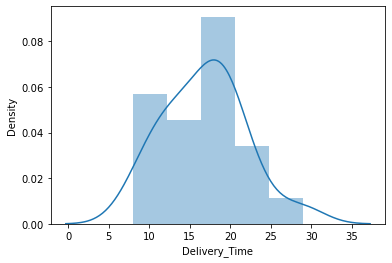

In [12]:
import seaborn as sns
sns.distplot(df['Delivery_Time'])

Fitting a Linear Regression Model

In [13]:
import statsmodels.formula.api as smf

In [14]:
#OLS=Ordinary Least Squares
model = smf.ols('Delivery_Time~Sorting_Time', data = df).fit()

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

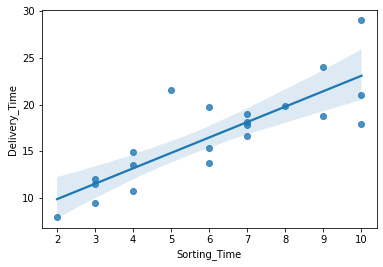

In [15]:
#To see the best fit line (which is as close as possible to as many points as possible)
sns.regplot(x = 'Sorting_Time', y = 'Delivery_Time', data = df)

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           3.98e-06
Time:                        17:22:36   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
#Coefficients
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

##### Interpretation for Beta Coefficient of Daily
##### For every unit increase in the Sorting Time value, the value for Delivery Time will increase by 1.649020

In [18]:
#LOG, SQRT and CBRT Transformations and appending them to the table 

#LOG

df['Delivery_Time_Log'] = np.log(df['Delivery_Time'])
df['Sorting_Time_Log'] = np.log(df['Sorting_Time'])

#SQRT

df['Delivery_Time_SQRT'] = np.sqrt(df['Delivery_Time'])
df['Sorting_Time_SQRT'] = np.sqrt(df['Sorting_Time'])

#CBRT

df['Delivery_Time_CBRT'] = np.cbrt(df['Delivery_Time'])
df['Sorting_Time_CBRT'] = np.cbrt(df['Sorting_Time'])

df

,Delivery_Time,Sorting_Time,Delivery_Time_Log,Sorting_Time_Log,Delivery_Time_SQRT,Sorting_Time_SQRT,Delivery_Time_CBRT,Sorting_Time_CBRT
0,21.00,10,3.044522,2.302585,4.582576,3.162278,2.758924,2.154435
1,13.50,4,2.602690,1.386294,3.674235,2.000000,2.381102,1.587401
2,19.75,6,2.983153,1.791759,4.444097,2.449490,2.703060,1.817121
3,24.00,9,3.178054,2.197225,4.898979,3.000000,2.884499,2.080084
4,29.00,10,3.367296,2.302585,5.385165,3.162278,3.072317,2.154435
5,15.35,6,2.731115,1.791759,3.917908,2.449490,2.485246,1.817121
6,19.00,7,2.944439,1.945910,4.358899,2.645751,2.668402,1.912931
7,9.50,3,2.251292,1.098612,3.082207,1.732051,2.117912,1.442250
8,17.90,10,2.884801,2.302585,4.230839,3.162278,2.615879,2.154435
9,18.75,9,2.931194,2.197225,4.330127,3.000000,2.656646,2.080084


<AxesSubplot:xlabel='Delivery_Time_Log', ylabel='Sorting_Time_Log'>

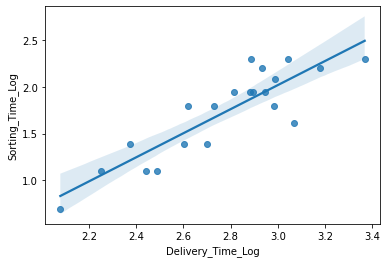

In [19]:
model_log = smf.ols('Delivery_Time_Log~Sorting_Time_Log', data = df).fit()
sns.regplot(x = 'Delivery_Time_Log', y = 'Sorting_Time_Log', data = df)

In [20]:
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Delivery_Time_Log   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           1.60e-07
Time:                        17:22:37   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.7420      0.133     13.086      0.000       1.463       2.021
Sorting_Time_Log     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='Delivery_Time_SQRT', ylabel='Sorting_Time_SQRT'>

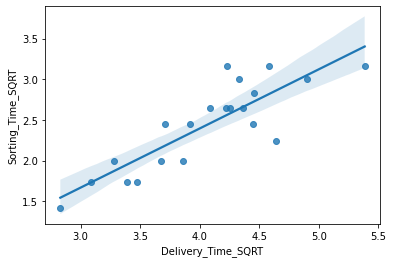

In [21]:
model_sqrt = smf.ols('Delivery_Time_SQRT~Sorting_Time_SQRT', data = df).fit()
sns.regplot(x = 'Delivery_Time_SQRT', y = 'Sorting_Time_SQRT', data = df)

In [22]:
model_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Delivery_Time_SQRT   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.16
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           8.48e-07
Time:                        17:22:37   Log-Likelihood:                -5.7320
No. Observations:                  21   AIC:                             15.46
Df Residuals:                      19   BIC:                             17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.6135      0.349      4.628      0.000       0.884       2.343
Sorting_Time_SQRT     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='Delivery_Time_CBRT', ylabel='Sorting_Time_CBRT'>

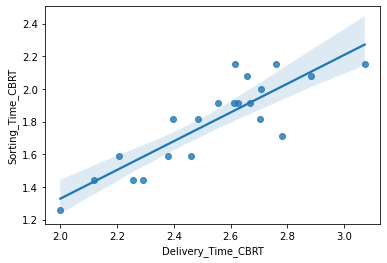

In [23]:
model_cbrt = smf.ols('Delivery_Time_CBRT~Sorting_Time_CBRT', data = df).fit()
sns.regplot(x = 'Delivery_Time_CBRT', y = 'Sorting_Time_CBRT', data = df)

In [24]:
model_cbrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Delivery_Time_CBRT   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     55.25
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           4.90e-07
Time:                        17:22:37   Log-Likelihood:                 13.035
No. Observations:                  21   AIC:                            -22.07
Df Residuals:                      19   BIC:                            -19.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.0136      0.207      4.900      0.000       0.581       1.447
Sorting_Time_CBRT     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
#To generate the fitted values

df['Predicted'] = model_log.fittedvalues

#To generate the residual values
#Difference between Actual & fitted values

df['Error'] = model_log.resid

df['Error_sq'] = (df['Error'])**2
df

,Delivery_Time,Sorting_Time,Delivery_Time_Log,Sorting_Time_Log,Delivery_Time_SQRT,Sorting_Time_SQRT,Delivery_Time_CBRT,Sorting_Time_CBRT,Predicted,Error,Error_sq
0,21.00,10,3.044522,2.302585,4.582576,3.162278,2.758924,2.154435,3.117833,-0.073311,0.005374
1,13.50,4,2.602690,1.386294,3.674235,2.000000,2.381102,1.587401,2.570329,0.032361,0.001047
2,19.75,6,2.983153,1.791759,4.444097,2.449490,2.703060,1.817121,2.812603,0.170550,0.029087
3,24.00,9,3.178054,2.197225,4.898979,3.000000,2.884499,2.080084,3.054878,0.123176,0.015172
4,29.00,10,3.367296,2.302585,5.385165,3.162278,3.072317,2.154435,3.117833,0.249463,0.062232
5,15.35,6,2.731115,1.791759,3.917908,2.449490,2.485246,1.817121,2.812603,-0.081488,0.006640
6,19.00,7,2.944439,1.945910,4.358899,2.645751,2.668402,1.912931,2.904712,0.039727,0.001578
7,9.50,3,2.251292,1.098612,3.082207,1.732051,2.117912,1.442250,2.398432,-0.147141,0.021650
8,17.90,10,2.884801,2.302585,4.230839,3.162278,2.615879,2.154435,3.117833,-0.233032,0.054304
9,18.75,9,2.931194,2.197225,4.330127,3.000000,2.656646,2.080084,3.054878,-0.123684,0.015298


In [26]:
model_log.pvalues

Intercept           5.921137e-11
Sorting_Time_Log    1.601539e-07
dtype: float64

In [27]:
Mean_Squared_Error = df['Error_sq'].mean()
Mean_Squared_Error

0.021973058112488137

#### Interpretation

##### Considering the model with highest r-squared value we have calculated predicted values, error compared to original data and will be using it to predict new values.  

Here Log transformation model is having higher r-squared value, so we will be using that to predict new values.

77.2% of variation in the dependent variable is explained by the given independent variable.


### Predict for new data points

In [28]:
# Predict for log of Sorting Time 5, 7, 9 using model_log.fitted values
newdata = pd.Series([5, 7, 9])
newdata

0    5
1    7
2    9
dtype: int64

In [29]:
newdf = pd.DataFrame(newdata, columns = ['Sorting_Time_Log'])
newdf

,Sorting_Time_Log
0,5
1,7
2,9


In [30]:
model_log.predict(newdf)

0    4.729599
1    5.924643
2    7.119688
dtype: float64

In [31]:
newdf['Predicted'] = model_log.predict(newdf)
newdf

,Sorting_Time_Log,Predicted
0,5,4.729599
1,7,5.924643
2,9,7.119688
